In [1]:
import pandas as pd
pd.set_option("display.max_columns",250)
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from IPython.display import Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
def make_comparison_bar_plot(variable, title, xlabel, xlabel_rotation, dfs, sources, sort_by=None, weight_var='weight', percentage=True):
    all_dfs = []
    for df, source in zip(dfs, sources):
        if sort_by is not None:
            df_groups = df.groupby([variable, sort_by])[weight_var].agg(sum)
            df_groups = df_groups.sort_index(level=sort_by)
        else:
            df_groups = df.groupby(variable)[weight_var].agg(sum)
        groups_df = df_groups.to_frame()
        groups_df["percent"] = groups_df[weight_var] / groups_df[weight_var].sum() * 100
        groups_df['source'] = source
        all_dfs.append(groups_df)
    all_df = pd.concat(all_dfs).reset_index()

    plt.figure(figsize=(10,7))
    if percentage:
        sns.barplot(data=all_df, x=variable, y='percent', hue='source')
        plt.ylabel("Weighted Percent", fontsize=16)
    else:
        sns.barplot(data=all_df, x=variable, y=weight_var, hue='source')
        plt.ylabel("Weighted Counts", fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(rotation=xlabel_rotation)
    plt.title(title, fontsize=16)
    plt.show()
    
def make_comparison_hist(variable, bins, bin_range, title, xlabel, xlabel_rotation, dfs, sources, sort_by=None, weight_var='weight'):
    plt.figure(figsize=(10,7))
    for df, desc in zip(dfs, sources):
        df[variable].hist(
            bins=bins,
            weights=df.loc[pd.notna(df[variable]), weight_var],
            alpha=0.5, density=True, range=bin_range,
            label=desc)
    
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(rotation=xlabel_rotation)
    plt.ylabel("Relative Share", fontsize=16)
    plt.legend(loc='best')
    plt.title(title, fontsize=16)
    plt.show()

In [4]:
asim_output_dir = r"E:\Projects\Clients\SEMCOG\Tasks\Task16_UniversityEnhancements\data\asim_output_03-12-2021"
trips = pd.read_csv(os.path.join(asim_output_dir, 'final_trips.csv'))
persons = pd.read_csv(os.path.join(asim_output_dir, 'final_persons.csv'))
hh = pd.read_csv(os.path.join(asim_output_dir, 'final_households.csv'))
landuse = pd.read_csv(os.path.join(asim_output_dir, 'final_land_use.csv'))

In [5]:
processed_transit_survey_path = r"E:\Projects\Clients\SEMCOG\Tasks\Task8_OnBoardSurvey\output"
obs_df = pd.read_csv(os.path.join(processed_transit_survey_path, 'processed_obs.csv'))

C:\Users\david.hensle\.conda\envs\asim_univ_dev\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,13,14,15,16,17,18,19,26,29,30,35,39,40,44,49,52,53,58,59,60,61,62,63,67,109,205,216,218,221) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
obs_df.head()

,Unnamed: 0,index,ID,DATE,ROUTE_SURVEYED.Code.,ROUTE_SURVEYED,RESIDENT_OR_VISITOR.Code.,RESIDENT_OR_VISITOR,HOME_CITY,HOME_STATE,HOME_ZIP,HOME_LAT,HOME_LON,HOME_TAZ,HOME_DISTRICT,HOTEL_CITY,HOTEL_STATE,HOTEL_ZIP,HOTEL_LAT,HOTEL_LON,HOTEL_TAZ,HOTEL_DISTRICT,ORIGIN_PLACE_TYPE.Code.,ORIGIN_PLACE_TYPE,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_ZIP,ORIGIN_LAT,ORIGIN_LON,ORIGIN_TAZ,ORIGIN_DISTRICT,PREV_TRANSFERS.Code.,PREV_TRANSFERS,TRIP_FIRST_ROUTE.Code.,TRIP_FIRST_ROUTE,TRIP_FIRST_ROUTE..Other.,TRIP_SECOND_ROUTE.Code.,TRIP_SECOND_ROUTE,TRIP_SECOND_ROUTE..Other.,TRIP_THIRD_ROUTE.Code.,TRIP_THIRD_ROUTE,TRIP_THIRD_ROUTE..Other.,ORIGIN_TRANSPORT.Code.,ORIGIN_TRANSPORT,ORIGIN_TRANSPORT..Other.,DESTIN_PLACE_TYPE.Code.,DESTIN_PLACE_TYPE,DESTIN_CITY,DESTIN_STATE,DESTIN_ZIP,DESTIN_LAT,DESTIN_LON,DESTIN_TAZ,DESTIN_DISTRICT,NEXT_TRANSFERS.Code.,NEXT_TRANSFERS,TRIP_NEXT_ROUTE.Code.,TRIP_NEXT_ROUTE,TRIP_NEXT_ROUTE..Other.,TRIP_AFTER_ROUTE.Code.,TRIP_AFTER_ROUTE,TRIP_AFTER_ROUTE..Other.,TRIP_3RD_ROUTE.Code.,TRIP_3RD_ROUTE,TRIP_3RD_ROUTE..Other.,DESTIN_TRANSPORT.Code.,DESTIN_TRANSPORT,DESTIN_TRANSPORT..Other.,STOP_ON..ADDR.,STOP_ON..CLNTID.,STOP_ON..LAT.,STOP_ON..LONG.,STOP_OFF..ADDR.,STOP_OFF..CLNTID.,STOP_OFF..LAT.,STOP_OFF..LONG.,PREV_TRAN_1_ON_BUS..LAT.,PREV_TRAN_1_ON_BUS..LONG.,PREV_TRAN_1_OFF_BUS..LAT.,PREV_TRAN_1_OFF_BUS..LONG.,PREV_TRAN_2_ON_BUS..LAT.,PREV_TRAN_2_ON_BUS..LONG.,PREV_TRAN_2_OFF_BUS..LAT.,PREV_TRAN_2_OFF_BUS..LONG.,PREV_TRAN_3_ON_BUS..LAT.,PREV_TRAN_3_ON_BUS..LONG.,PREV_TRAN_3_OFF_BUS..LAT.,PREV_TRAN_3_OFF_BUS..LONG.,NEXT_TRAN_1_ON_BUS..LAT.,NEXT_TRAN_1_ON_BUS..LONG.,NEXT_TRAN_1_OFF_BUS..LAT.,NEXT_TRAN_1_OFF_BUS..LONG.,NEXT_TRAN_2_ON_BUS..LAT.,NEXT_TRAN_2_ON_BUS..LONG.,NEXT_TRAN_2_OFF_BUS..LAT.,NEXT_TRAN_2_OFF_BUS..LONG.,NEXT_TRAN_3_ON_BUS..LAT.,NEXT_TRAN_3_ON_BUS..LONG.,NEXT_TRAN_3_OFF_BUS..LAT.,NEXT_TRAN_3_OFF_BUS..LONG.,TIME_ON.Code.,TIME_ON,TIME_PERIOD,TRIP_IN_OPPO_DIR.Code.,TRIP_IN_OPPO_DIR,OPPO_DIR_TRIP_TIME.Code.,OPPO_DIR_TRIP_TIME,RETURN_TRIP_MODE.Code.,RETURN_TRIP_MODE,RETURN_TRIP_MODE..Other.,DDOT_5.DAY_PASS,DDOT_.10_VALUE_CARD.,DDOT_BIWEEKLY_GOPASS,DDOT_WEEKLY_GOPASS,DDOT_MONTHLY_GOPASS,DDOT_CASH,DDOT.SMART_REGIONAL_MONTHLY_PASS,SMART_31_DAY_PASS.,SMART_.11_VALUE_PASS,SMART_.22_VALUE_PASS,SMART_REGIONAL_PASS,SMART_REGIONAL_PLUS_PASS,SMART_CASH,SMART_._DDOT_REGIONAL_PASS_4_HOUR_DART,SMART_._DDOT_REGIONAL_PASS_24_HOUR_DART,...,Q_LINE_SINGLE_PASS,Q_LINE_DAY_PASS,Q_LINE_MONTHLY_PASS,Q_LINE_ANNUAL_PASS,DPM_SINGLE_TOKEN,DPM_MONTHLY_PASS,DPM_ANNUAL_PASS,DPM_SPECIAL_EVENT_PASS,BW_DAY_PASS,BW_10.DAY_PASS,BW_MONTH_PASS,BW_CASH,LET_2.HOUR_ONE_WAY,LET_ALL_DAY_PASS,LET_31.DAY_PASS,LET_VALUE_CARD,FLINT_MTA_.3_FARE,MTA_.80_PASS,MTA_.90_PASS,FARE_METHOD..Other.,FARE_METHOD_NOT_PROVIDED,TYPE_OF_FARE.Code.,TYPE_OF_FARE,TYPE_OF_FARE..Other.,EMPLOYER_PAID_FARE.Code.,EMPLOYER_PAID_FARE,HOW_NO_BUS.Code.,HOW_NO_BUS,HOW_NO_BUS..Other.,TRANSIT_USE_FREQ.Code.,TRANSIT_USE_FREQ,HAVE_SMARTPHONE.Code.,HAVE_SMARTPHONE,HAVE_CC.Code.,HAVE_CC,USE_SERVICES_SE_MI..1.,USE_SERVICES_SE_MI..2.,USE_SERVICES_SE_MI..3.,USE_SERVICES_SE_MI..4.,USE_SERVICES_SE_MI..5.,USE_SERVICES_SE_MI..Other.,COUNT_VH_HH.Code.,COUNT_VH_HH,USED_VEH_TRIP.Code.,USED_VEH_TRIP,HH_SIZE.Code.,HH_SIZE,EMPLOYED_IN_HH.Code.,EMPLOYED_IN_HH,EMPLOYMENT_STATUS.Code.,EMPLOYMENT_STATUS,STUDENT_STATUS.Code.,STUDENT_STATUS,HAVE_DL.Code.,HAVE_DL,DISABILITY.Code.,DISABILITY,AGE.Code.,AGE,RACE_ETHNICITY..1.,RACE_ETHNICITY..2.,RACE_ETHNICITY..3.,RACE_ETHNICITY..4.,RACE_ETHNICITY..5.,RACE_ETHNICITY..6.,RACE_ETHNICITY..7.,RACE_ETHNICITY..Other.,HOME_LANG_OTHER.Code.,HOME_LANG_OTHER,HOME_OTHER_LANG.Code.,HOME_OTHER_LANG,HOME_OTHER_LANG..Other.,ENGLISH_ABILITY.Code.,ENGLISH_ABILITY,INCOME.Code.,INCOME,USE_TRANSIT_WEEKEND.Code.,USE_TRANSIT_WEEKEND,SAME_TRIP_ON_WEEKEND.Code.,SAME_TRIP_ON_WEEKEND,SAME_ROUTES_WEEKEND.Code.,SAME_ROUTES_WEEKEND,GENDER.Code.,GENDER,GENDER..Other.,SURVEY_LANGUAGE.Code.,SURVEY_LANGUAGE,SURVEY_LANGUAGE..Other.,AGENCY,STOP_ON.SEGMENT.,STOP_OFF.SEGMENT.,UNLINKED_WEIGHT_FACTOR,SYSTEM_TRANS

In [7]:
trips

,trip_id,person_id,household_id,tour_id,primary_purpose,trip_num,outbound,trip_count,parked_at_university,purpose,destination,origin,destination_logsum,original_school_zone_id,depart,tour_includes_parking,trip_id_pre_parking,trip_mode,mode_choice_logsum
0,897,2,1,56,othdiscr,1,True,1,False,othdiscr,2781,2781,NaN,NaN,8.0,0,449,WALK,0.000076
1,905,2,1,56,othdiscr,1,False,1,False,Home,2781,2781,NaN,NaN,10.0,0,453,WALK,0.000076
2,1281,1,1,80,work,1,True,2,False,othdiscr,2781,2781,7.547420,NaN,4.0,0,641,WALK,0.483676
3,1282,1,1,80,work,2,True,2,False,work,2720,2781,NaN,NaN,9.0,0,642,SHARED2,-0.811549
4,1289,1,1,80,work,1,False,2,False,othmaint,1534,2720,7.488112,NaN,23.0,0,645,SHARED2,-0.725846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17155826,3076843994,4690310,1909260,192302749,work,2,False,2,False,Home,248,1056,NaN,NaN,26.0,0,1538421998,DRIVEALONE,-1.894190
17155827,3076863569,4690340,1909290,192303973,shopping,1,True,1,False,shopping,422,248,NaN,NaN,32.0,0,1538431785,DRIVEALONE,-0.787615
17155828,3076863577,4690340,1909290,192303973,shopping,1,False,1,False,Home,248,422,NaN,NaN,34.0,0,1538431789,DRIVEALONE,-0.788995
17155829,3076863665,4690340,1909290,192303979,work,1,True,1,False,work,429,248,NaN,NaN,9.0,0,1538431833,DRIVEALONE,-0.290412


In [45]:
trips.trip_mode.value_counts()

DRIVEALONE    8298482
SHARED2       4068755
SHARED3       2471373
WALK          1161208
SCHOOLBUS      503506
WALK_LOC       350614
BIKE           181204
TNC_SINGLE      91208
PNR_LOC         11670
TNC_SHARED       9828
KNR_LOC          2715
TAXI             2479
WALK_PRM         1286
PNR_PRM          1097
WALK_MIX          378
KNR_MIX            16
PNR_MIX            12
Name: trip_mode, dtype: int64

In [8]:
transit_trip_modes = ['WALK_LOC', 'WALK_PRM', 'WALK_MIX', 'PNR_LOC', 'PNR_PRM', 'PNR_MIX', 'KNR_LOC', 'KNR_PRM', 'KNR_MIX']
trips['is_transit_trip'] = np.where(trips['trip_mode'].isin(transit_trip_modes), True, False)

In [9]:
trips['is_transit_trip'].value_counts()

False    16788043
True       367788
Name: is_transit_trip, dtype: int64

## Examining Ann Arbor Area
The only transit services in the Ann Arbor area are University of Michigan Transit (UMT) and Ann Arbor Transportation Authority (AAA). These two services will be selected from the OBS.

Ann Arbor can be selected by looking at districts [214, 220] in the landuse.  All trips with a destination in these districts should be counted

#### Total Transit Trips

In [10]:
obs_aa = obs_df[obs_df['AGENCY'].isin(['UMT', 'AATA'])].copy()
obs_aa['weight'] = obs_aa['Updated_LinkedWeightFactor']

In [11]:
ann_arbor_tazs = landuse.loc[landuse['DISTRICT'].isin(range(214,221)), 'zone_id']
aa_trips = trips[trips['destination'].isin(ann_arbor_tazs)]
aa_trn_trips = trips[trips['is_transit_trip']].copy()
aa_trn_trips['weight'] = 1/hh['sample_rate'][0]

In [42]:
ann_arbor_tazs

2115    2116
2116    2117
2117    2118
2118    2119
2119    2120
        ... 
2242    2243
2243    2244
2244    2245
2245    2246
2246    2247
Name: zone_id, Length: 132, dtype: int64

Since we are summarizing linked transit trips, need to remove parking trips from ActivitySim trips table

In [12]:
aa_trn_trips = aa_trn_trips[aa_trn_trips['purpose'] != 'parking'].copy()

In [13]:
# merging person info
aa_trn_trips = pd.merge(
    aa_trn_trips,
    persons,
    how='left',
    on='person_id'
)

In [14]:
obs_aa_trips = obs_aa['Updated_LinkedWeightFactor'].sum()
all_obs_trips = obs_df['Updated_LinkedWeightFactor'].sum()
per_obs_aa = round(obs_aa_trips/all_obs_trips *100, 2)
print("Total linked weighted trips in OBS: ", int(all_obs_trips))
print("Total linked weighted trips in Ann Arbor: ", int(obs_aa_trips), ' = ', per_obs_aa, '%\n' )

num_aa_trn_trips = aa_trn_trips['weight'].sum()
all_trn_trips = trips['is_transit_trip'].sum()
per_trn_aa = round(num_aa_trn_trips/all_trn_trips *100, 2)
print("Total linked transit trips in ActivitySim: ", int(all_trn_trips))
print("Total linked transit trips in Ann Arbor: ", int( num_aa_trn_trips), ' = ', per_trn_aa, '%' )

Total linked weighted trips in OBS:  138741
Total linked weighted trips in Ann Arbor:  39181  =  28.24 %

Total linked transit trips in ActivitySim:  367788
Total linked transit trips in Ann Arbor:  265032  =  72.06 %


#### Transit Trips by Mode

Taking transit mode directly from trips file:


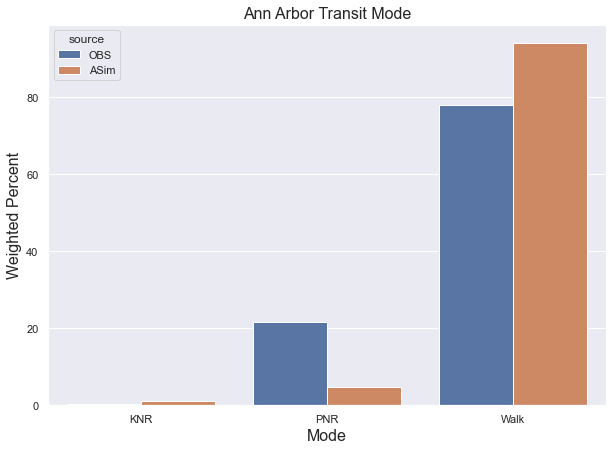

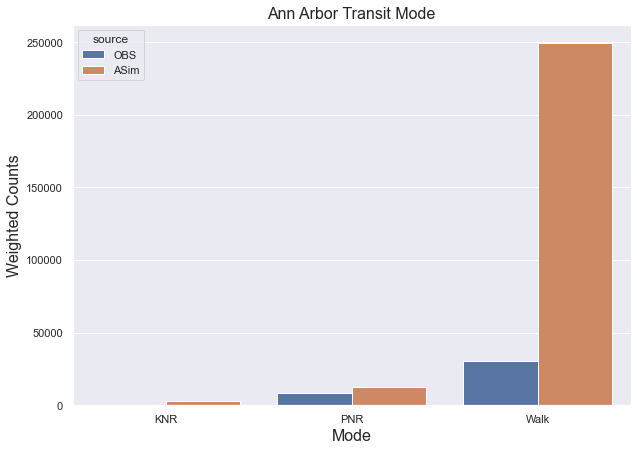

In [15]:
trn_mode_conditions = [
    aa_trn_trips['trip_mode'].isin(['WALK_LOC', 'WALK_PRM', 'WALK_MIX']),
    aa_trn_trips['trip_mode'].isin(['PNR_LOC', 'PNR_PRM', 'PNR_MIX']),
    aa_trn_trips['trip_mode'].isin(['KNR_LOC', 'KNR_PRM', 'KNR_MIX']),
]
trn_modes = ['Walk', 'PNR', 'KNR']
aa_trn_trips['TOUR_MODE'] = np.select(trn_mode_conditions, trn_modes)

print("Taking transit mode directly from trips file:")
make_comparison_bar_plot(
    variable='TOUR_MODE',
    title='Ann Arbor Transit Mode',
    xlabel='Mode',
    xlabel_rotation=0,
    dfs=[obs_aa, aa_trn_trips],
    sources=['OBS', 'ASim'],
    percentage=True
)

make_comparison_bar_plot(
    variable='TOUR_MODE',
    title='Ann Arbor Transit Mode',
    xlabel='Mode',
    xlabel_rotation=0,
    dfs=[obs_aa, aa_trn_trips],
    sources=['OBS', 'ASim'],
    percentage=False
)



If parked at university, mode changed to PNR


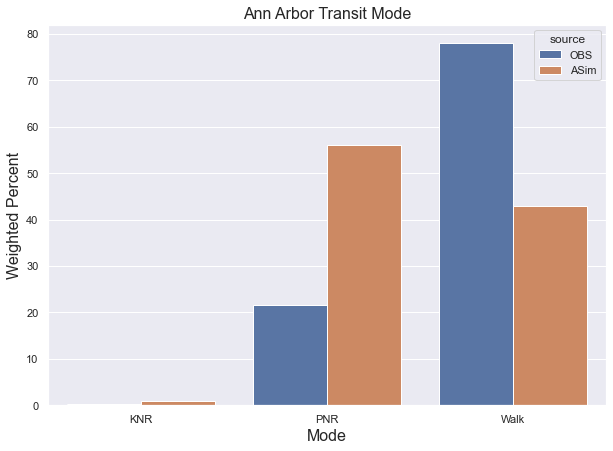

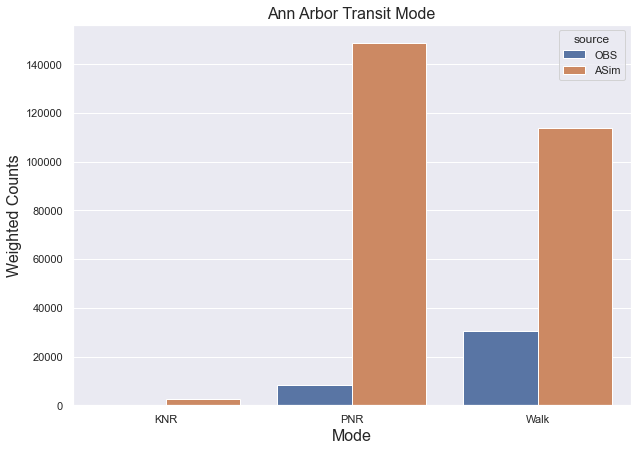

In [16]:
trn_mode_conditions = [
    aa_trn_trips['trip_mode'].isin(['WALK_LOC', 'WALK_PRM', 'WALK_MIX']),
    aa_trn_trips['trip_mode'].isin(['PNR_LOC', 'PNR_PRM', 'PNR_MIX']),
    aa_trn_trips['trip_mode'].isin(['KNR_LOC', 'KNR_PRM', 'KNR_MIX']),
]
trn_modes = ['Walk', 'PNR', 'KNR']
aa_trn_trips['TOUR_MODE'] = np.where(aa_trn_trips['parked_at_university'], 'PNR', aa_trn_trips['TOUR_MODE'])

print("If parked at university, mode changed to PNR")
make_comparison_bar_plot(
    variable='TOUR_MODE',
    title='Ann Arbor Transit Mode',
    xlabel='Mode',
    xlabel_rotation=0,
    dfs=[obs_aa, aa_trn_trips],
    sources=['OBS', 'ASim'],
    percentage=True
)

make_comparison_bar_plot(
    variable='TOUR_MODE',
    title='Ann Arbor Transit Mode',
    xlabel='Mode',
    xlabel_rotation=0,
    dfs=[obs_aa, aa_trn_trips],
    sources=['OBS', 'ASim'],
    percentage=False
)

#### Transit trips by Purpose

In [17]:
print('Raw OBS Destination Purpose: ')
obs_aa['DEST_PURPOSE'].value_counts()

Raw OBS Destination Purpose: 


University           680
Home                 460
Work                 343
Other Maintenance     77
Social/Rec            70
Eat Out               26
Shopping              10
Hotel                  2
School                 2
Escorting              2
Name: DEST_PURPOSE, dtype: int64

In [18]:
print('ActivitySim Trip Purpose:')
aa_trn_trips['purpose'].value_counts(dropna=False)

ActivitySim Trip Purpose:


Home        52688
work        47742
univ        34274
othmaint    29890
othdiscr    19129
escort      17576
eatout      17462
shopping    16612
social      10573
atwork       9547
Work         6716
school       2823
Name: purpose, dtype: int64

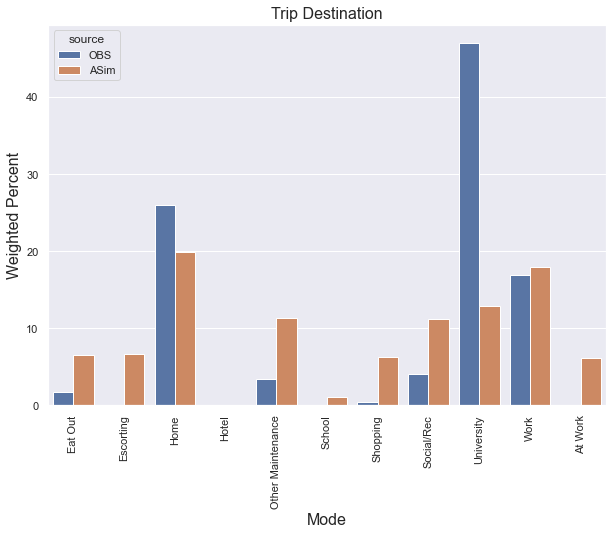

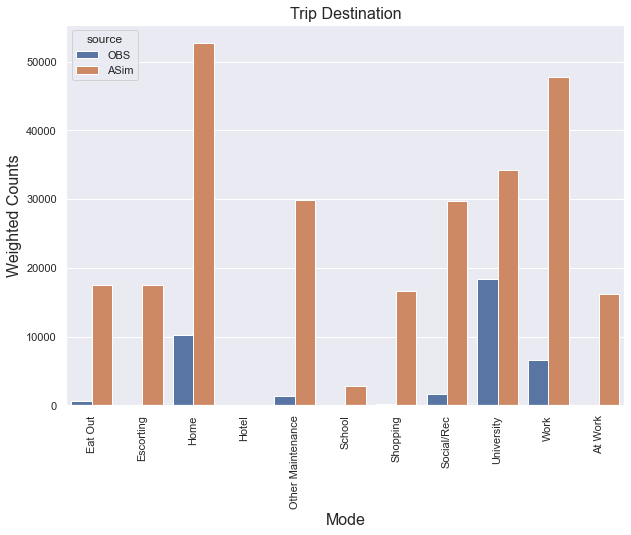

In [19]:
purp_dict = {
    'Home': 'Home',
    'work': 'Work',
    'univ': 'University',
    'othmaint': 'Other Maintenance',
    'othdiscr': 'Social/Rec',
    'shopping': 'Shopping',
    'atwork': 'At Work',
    'Work': 'At Work',
    'escort': 'Escorting',
    'school': 'School',
    'eatout': 'Eat Out',
    'social': 'Social/Rec'}

aa_trn_trips['DEST_PURPOSE'] = aa_trn_trips['purpose'].map(purp_dict)

make_comparison_bar_plot(
    variable='DEST_PURPOSE',
    title='Trip Destination',
    xlabel='Mode',
    xlabel_rotation=90,
    dfs=[obs_aa, aa_trn_trips],
    sources=['OBS', 'ASim'],
    percentage=True
)

make_comparison_bar_plot(
    variable='DEST_PURPOSE',
    title='Trip Destination',
    xlabel='Mode',
    xlabel_rotation=90,
    dfs=[obs_aa, aa_trn_trips],
    sources=['OBS', 'ASim'],
    percentage=False
)

In [20]:
pd.crosstab(aa_trn_trips['DEST_PURPOSE'], aa_trn_trips['purpose'], dropna=False)

purpose,Home,Work,atwork,eatout,escort,othdiscr,othmaint,school,shopping,social,univ,work
DEST_PURPOSE,,,,,,,,,,,,
At Work,0,6716,9547,0,0,0,0,0,0,0,0,0
Eat Out,0,0,0,17462,0,0,0,0,0,0,0,0
Escorting,0,0,0,0,17576,0,0,0,0,0,0,0
Home,52688,0,0,0,0,0,0,0,0,0,0,0
Other Maintenance,0,0,0,0,0,0,29890,0,0,0,0,0
School,0,0,0,0,0,0,0,2823,0,0,0,0
Shopping,0,0,0,0,0,0,0,0,16612,0,0,0
Social/Rec,0,0,0,0,0,19129,0,0,0,10573,0,0
University,0,0,0,0,0,0,0,0,0,0,34274,0


In [47]:
(1749343 + 659107)/612

3935.375816993464

## Non-home based trips

In [21]:
aa_trn_trips['non_home_based'] = 1
trips_from_home = ((aa_trn_trips['parked_at_university'] == False) & (aa_trn_trips['trip_num'] == 1)
                 | (aa_trn_trips['parked_at_university'] == True) & (aa_trn_trips['trip_num'] == 2))
trips_to_home = ((aa_trn_trips['outbound'] == False)
                 &((aa_trn_trips['parked_at_university'] == False) & (aa_trn_trips['trip_num'] == aa_trn_trips['trip_count'])
                  | (aa_trn_trips['parked_at_university'] == True) & (aa_trn_trips['trip_num'] == aa_trn_trips['trip_count'] - 1)))
aa_trn_trips.loc[trips_from_home | trips_to_home, 'non_home_based'] = 0

In [22]:
nhb_obs_aa = obs_aa[(obs_aa['ORIG_PURPOSE'] != 'Home') & (obs_aa['DEST_PURPOSE'] != 'Home')]
# total trips
tot_obs_aa_trips = int(obs_aa['Updated_LinkedWeightFactor'].sum())
tot_asim_aa_trips = aa_trn_trips['weight'].sum()

#total nhb trips
nhb_obs_trips = int(nhb_obs_aa['Updated_LinkedWeightFactor'].sum())
nhb_obs_trips_per = round((nhb_obs_trips / tot_obs_aa_trips) * 100, 2)

nhb_asim_aa_trips = aa_trn_trips['non_home_based'].sum()
nhb_asim_trips_per = round((nhb_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Total Ann Arbor linked transit trips")
print('OBS: ', tot_obs_aa_trips)
print('ASim: ', tot_asim_aa_trips)
per_diff = round((tot_asim_aa_trips - tot_obs_aa_trips) / tot_obs_aa_trips * 100, 2)
print(' = ', per_diff, '% different')
print('\n')

print('Non-Home Based transit trips')
print('OBS: ', nhb_obs_trips, '=', nhb_obs_trips_per, '% of total')
print('ASim: ', nhb_asim_aa_trips, '=', nhb_asim_trips_per, '% of total')


Total Ann Arbor linked transit trips
OBS:  39181
ASim:  265032.0
 =  576.43 % different


Non-Home Based transit trips
OBS:  8679 = 22.15 % of total
ASim:  62596 = 23.62 % of total


## Person Status

### University Students

In [23]:
print("Raw OBS Student Status in Ann Arbor:")
obs_aa['STUDENT_STATUS'].value_counts()

Raw OBS Student Status in Ann Arbor:


Yes - Full time College / University    1162
Not a student                            454
Yes - Part time College / University      44
Yes - K - 12th grade                       9
Yes - Other type of student                3
Name: STUDENT_STATUS, dtype: int64

In [24]:
obs_aa['is_university'] = obs_aa['STUDENT_STATUS'].isin(
    ['Yes - Full time College / University', 'Yes - Part time College / University'])

# trips made by university students
univ_obs_trips = int(obs_aa.loc[obs_aa['is_university'] == True, 'Updated_LinkedWeightFactor'].sum())
univ_obs_trips_per = round((univ_obs_trips / tot_obs_aa_trips) * 100, 2)

univ_asim_aa_trips = aa_trn_trips['is_university'].sum()
univ_asim_trips_per = round((univ_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Linked transit trips by university students")
print('OBS: ', univ_obs_trips, ' = ', univ_obs_trips_per, '% of total')
print('ABS: ', univ_asim_aa_trips, ' = ', univ_asim_trips_per, '% of total')

Linked transit trips by university students
OBS:  31235  =  79.72 % of total
ABS:  74732  =  28.2 % of total


In [25]:
# university trips
univ_obs_trips = int(obs_aa.loc[obs_aa['DEST_PURPOSE'] == 'University', 'Updated_LinkedWeightFactor'].sum())
univ_obs_trips_per = round((univ_obs_trips / tot_obs_aa_trips) * 100, 2)

univ_asim_aa_trips = len(aa_trn_trips[aa_trn_trips['purpose'] == 'univ'])
univ_asim_trips_per = round((univ_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Linked transit trips to university")
print('OBS: ', univ_obs_trips, ' = ', univ_obs_trips_per, '% of total')
print('ABS: ', univ_asim_aa_trips, ' = ', univ_asim_trips_per, '% of total')

Linked transit trips to university
OBS:  18417  =  47.0 % of total
ABS:  34274  =  12.93 % of total


In [26]:
# work trips made by univ students
univ_obs_trips = int(obs_aa.loc[(obs_aa['is_university'] == True) & (obs_aa['DEST_PURPOSE'] == 'University'), 'Updated_LinkedWeightFactor'].sum())
univ_obs_trips_per = round((univ_obs_trips / tot_obs_aa_trips) * 100, 2)

univ_asim_aa_trips = len(aa_trn_trips[(aa_trn_trips['is_university'] == True) & (aa_trn_trips['DEST_PURPOSE'] == 'University')])
univ_asim_trips_per = round((univ_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Linked transit trips to university by university students")
print('OBS: ', univ_obs_trips, ' = ', univ_obs_trips_per, '% of total')
print('ABS: ', univ_asim_aa_trips, ' = ', univ_asim_trips_per, '% of total')

Linked transit trips to university by university students
OBS:  18282  =  46.66 % of total
ABS:  34227  =  12.91 % of total


In [27]:
# work trips made by univ students
work_obs_trips = int(obs_aa.loc[(obs_aa['is_university'] == True) & (obs_aa['DEST_PURPOSE'] == 'Work'), 'Updated_LinkedWeightFactor'].sum())
work_obs_trips_per = round((work_obs_trips / tot_obs_aa_trips) * 100, 2)

work_asim_aa_trips = len(aa_trn_trips[(aa_trn_trips['is_university'] == True) & (aa_trn_trips['DEST_PURPOSE'] == 'Work')])
work_asim_trips_per = round((work_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Linked transit trips to work by university students")
print('OBS: ', work_obs_trips, ' = ', work_obs_trips_per, '% of total')
print('ABS: ', work_asim_aa_trips, ' = ', work_asim_trips_per, '% of total')

Linked transit trips to work by university students
OBS:  2111  =  5.39 % of total
ABS:  2935  =  1.11 % of total


In [28]:
# non-univ trips made by univ students
other_univ_obs_trips = int(obs_aa.loc[(obs_aa['is_university'] == True) & (obs_aa['DEST_PURPOSE'] != 'University'), 'Updated_LinkedWeightFactor'].sum())
other_univ_obs_trips_per = round((other_univ_obs_trips / tot_obs_aa_trips) * 100, 2)

other_univ_asim_aa_trips = len(aa_trn_trips[(aa_trn_trips['is_university'] == True) & (aa_trn_trips['DEST_PURPOSE'] != 'University')])
other_univ_asim_trips_per = round((other_univ_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Linked transit trips by university students not to university")
print('OBS: ', other_univ_obs_trips, ' = ', other_univ_obs_trips_per, '% of total')
print('ABS: ', other_univ_asim_aa_trips, ' = ', other_univ_asim_trips_per, '% of total')

Linked transit trips by university students not to university
OBS:  12953  =  33.06 % of total
ABS:  40505  =  15.28 % of total


### Workers

In [29]:
print("Raw OBS Employment in Ann Arbor:")
obs_aa['EMPLOYMENT_STATUS'].value_counts()

Raw OBS Employment in Ann Arbor:


Employed full-time                              580
Employed part-time                              511
Not currently employed, and not seeking work    382
Not currently employed, but seeking work        194
Retired                                           4
Unknown                                           1
Name: EMPLOYMENT_STATUS, dtype: int64

In [30]:
obs_aa['is_worker'] = obs_aa['EMPLOYMENT_STATUS'].isin(['Employed full-time', 'Employed part-time'])

# trips made by workers
worker_obs_trips = int(obs_aa.loc[obs_aa['is_worker'] == True, 'Updated_LinkedWeightFactor'].sum())
worker_obs_trips_per = round((worker_obs_trips / tot_obs_aa_trips) * 100, 2)

worker_asim_aa_trips = aa_trn_trips['is_worker'].sum()
worker_asim_trips_per = round((worker_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Linked transit trips by workers")
print('OBS: ', worker_obs_trips, ' = ', worker_obs_trips_per, '% of total')
print('ABS: ', worker_asim_aa_trips, ' = ', worker_asim_trips_per, '% of total')

Linked transit trips by workers
OBS:  23213  =  59.25 % of total
ABS:  150884  =  56.93 % of total


In [31]:
# work trips
work_obs_trips = int(obs_aa.loc[obs_aa['DEST_PURPOSE'] == 'Work', 'Updated_LinkedWeightFactor'].sum())
work_obs_trips_per = round((work_obs_trips / tot_obs_aa_trips) * 100, 2)

work_asim_aa_trips = len(aa_trn_trips[aa_trn_trips['DEST_PURPOSE'] == 'Work'])
work_asim_trips_per = round((work_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Linked transit trips to work")
print('OBS: ', work_obs_trips, ' = ', work_obs_trips_per, '% of total')
print('ABS: ', work_asim_aa_trips, ' = ', work_asim_trips_per, '% of total')

Linked transit trips to work
OBS:  6627  =  16.91 % of total
ABS:  47742  =  18.01 % of total


In [32]:
# univ trips made by workers
univ_worker_obs_trips = int(obs_aa.loc[(obs_aa['is_worker'] == True) & (obs_aa['DEST_PURPOSE'] == 'University'), 'Updated_LinkedWeightFactor'].sum())
univ_worker_obs_trips_per = round((univ_worker_obs_trips / tot_obs_aa_trips) * 100, 2)

univ_worker_asim_aa_trips = len(aa_trn_trips[(aa_trn_trips['is_worker'] == True) & (aa_trn_trips['DEST_PURPOSE'] == 'University')])
univ_worker_asim_trips_per = round((univ_worker_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Linked transit trips to work by university students")
print('OBS: ', univ_worker_obs_trips, ' = ', univ_worker_obs_trips_per, '% of total')
print('ABS: ', univ_worker_asim_aa_trips, ' = ', univ_worker_asim_trips_per, '% of total')

Linked transit trips to work by university students
OBS:  7976  =  20.36 % of total
ABS:  10093  =  3.81 % of total


In [33]:
# non-univ trips made by univ students
other_work_obs_trips = int(obs_aa.loc[(obs_aa['is_worker'] == True) & (obs_aa['DEST_PURPOSE'] != 'Work'), 'Updated_LinkedWeightFactor'].sum())
other_work_obs_trips_per = round((other_work_obs_trips / tot_obs_aa_trips) * 100, 2)

other_work_asim_aa_trips = len(aa_trn_trips[(aa_trn_trips['is_worker'] == True) & (aa_trn_trips['DEST_PURPOSE'] != 'Work')])
other_work_asim_trips_per = round((other_work_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Linked transit trips by workers not to work")
print('OBS: ', other_work_obs_trips, ' = ', other_work_obs_trips_per, '% of total')
print('ABS: ', other_work_asim_aa_trips, ' = ', other_work_asim_trips_per, '% of total')

Linked transit trips by workers not to work
OBS:  16586  =  42.33 % of total
ABS:  104134  =  39.29 % of total


In [41]:
# trips made by other
worker_obs_trips = int(obs_aa.loc[obs_aa['is_worker'] & ~obs_aa['is_university'], 'Updated_LinkedWeightFactor'].sum())
worker_obs_trips_per = round((worker_obs_trips / tot_obs_aa_trips) * 100, 2)

worker_asim_aa_trips = aa_trn_trips.loc[aa_trn_trips['is_worker'] & ~aa_trn_trips['is_university'], 'weight'].sum()
worker_asim_trips_per = round((worker_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Linked transit trips by workers that are not university students")
print('OBS: ', worker_obs_trips, ' = ', worker_obs_trips_per, '% of total')
print('ABS: ', worker_asim_aa_trips, ' = ', worker_asim_trips_per, '% of total')

Linked transit trips by workers that are not university students
OBS:  7783  =  19.86 % of total
ABS:  126188.0  =  47.61 % of total


### Non-University & Non-Workers

In [34]:
# trips made by other
worker_obs_trips = int(obs_aa.loc[~obs_aa['is_worker'] & ~obs_aa['is_university'], 'Updated_LinkedWeightFactor'].sum())
worker_obs_trips_per = round((worker_obs_trips / tot_obs_aa_trips) * 100, 2)

worker_asim_aa_trips = aa_trn_trips.loc[~aa_trn_trips['is_worker'] & ~aa_trn_trips['is_university'], 'weight'].sum()
worker_asim_trips_per = round((worker_asim_aa_trips / tot_asim_aa_trips) * 100, 2)

print("Linked transit trips by Non-Workers & Non-Univ students")
print('OBS: ', worker_obs_trips, ' = ', worker_obs_trips_per, '% of total')
print('ABS: ', worker_asim_aa_trips, ' = ', worker_asim_trips_per, '% of total')

Linked transit trips by Non-Workers & Non-Univ students
OBS:  162  =  0.41 % of total
ABS:  64112.0  =  24.19 % of total


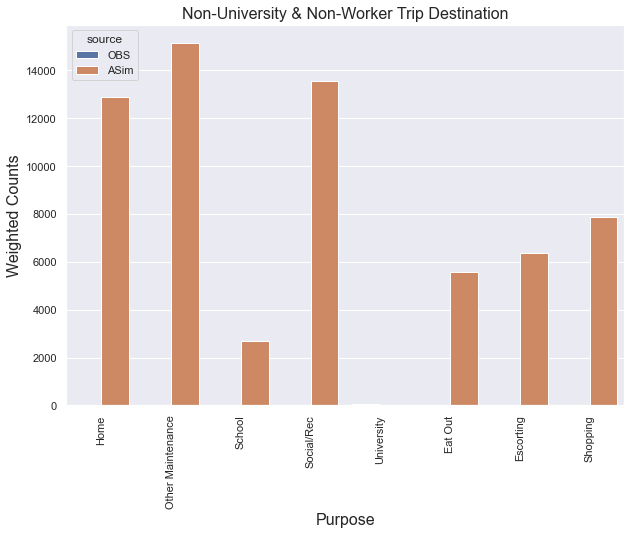

In [35]:
make_comparison_bar_plot(
    variable='DEST_PURPOSE',
    title='Non-University & Non-Worker Trip Destination',
    xlabel='Purpose',
    xlabel_rotation=90,
    dfs=[obs_aa.loc[~obs_aa['is_worker'] & ~obs_aa['is_university']], aa_trn_trips.loc[~aa_trn_trips['is_worker'] & ~aa_trn_trips['is_university']]],
    sources=['OBS', 'ASim'],
    percentage=False
)

## Number of University Students

In [36]:
landuse.head()

,zone_id,Unnamed: 0,COUNTY,EXTERNAL,DISTRICT,SUPER_DIST_25,tot_acres,tot_hhs,hhs_pop,workers,grppop,tot_pop,tot_emp,e01_nrm,e02_constr,e03_manuf,e04_whole,e05_retail,e06_trans,e07_utility,e08_infor,e09_finan,e10_pstsvc,e11_compmgt,e12_admsvc,e13_edusvc,e14_medfac,e15_hospit,e16_leisure,e17_othsvc,e18_pubadm,resid_sf,retail_sf,entmt_sf,othcom_sf,finan_sf,office_sf,indust_sf,medcare_sf,medical_sf,edu_sf,othinst_sf,TAZCE10_N,WrkPrkCost,NonWrkPrk,External,AirportADT,AreaType,University_Name,University_Tier,Univ_Enrollment,Univ_Resident,Univ_Employment,University_Enrollment,UMI,CBD,DET,PRKCST,OPRKCST,TERMINAL,TOPOLOGY,zoneid,n_schools,k12enroll,K_8,G9_12,parking_spaces,household_density,employment_density,density_index
0,1,0,1,0,5,3,77.468160,0,0,0,0,0,491,0,3,155,245,43,9,0,0,0,0,0,8,0,0,0,4,24,0,0,0,4800,24540,0,1750,821980,0,0,0,0,1101,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0.0,0.0,0,1,0,0,0,0,0,0,0.000000,6.338088,0.000000
1,2,1,1,0,5,3,155.161401,618,2049,710,0,2049,382,0,5,42,8,19,16,0,3,16,63,0,61,1,61,0,45,42,0,759434,32999,7201,22494,0,7414,108317,0,3033,0,2116,1102,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0.0,0.0,0,1,0,0,0,0,0,0,3.982949,2.461953,1.521487
2,3,2,1,0,5,3,79.889105,0,0,0,0,0,342,0,4,223,83,12,0,0,0,0,9,2,6,0,0,0,0,3,0,1626,34829,0,1478,0,2698,997995,0,0,0,0,1103,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0.0,0.0,0,1,0,0,0,0,0,0,0.000000,4.280934,0.000000
3,4,3,1,0,5,3,158.426406,578,1994,591,0,1994,407,0,16,8,5,40,21,0,2,4,9,0,35,134,28,0,47,58,0,846957,87093,32472,20965,0,27830,20052,0,9903,125995,12262,1104,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0.0,0.0,0,1,4,1,535,535,0,0,3.648382,2.569016,1.507504
4,5,4,1,0,5,3,84.868124,26,71,19,0,71,786,0,8,431,105,4,153,0,0,3,59,0,11,0,0,0,0,12,0,25587,8605,10272,5887,0,95462,849535,0,0,0,0,1111,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0.0,0.0,0,1,0,0,0,0,0,0,0.306358,9.261428,0.296548


In [37]:
uofm_zones = landuse.loc[landuse['University_Name'] == 'University of Michigan', 'zone_id']
uofm_students = persons[persons['school_zone_id'].isin(uofm_zones) & persons['is_university']]
print('Number of UofM Students in model: ', len(uofm_students))
print('UofM landuse enrollment: ', landuse.loc[landuse['University_Name'] == 'University of Michigan', 'Univ_Enrollment'].sum())

Number of UofM Students in model:  46968
UofM landuse enrollment:  43615


In [38]:
ann_arbor_univ_students = persons[persons['school_zone_id'].isin(ann_arbor_tazs) & persons['is_university']]
print('Number of Ann Arbor Univ Students in model: ', len(ann_arbor_univ_students))
print('Ann Arbor landuse enrollment: ', landuse.loc[landuse['zone_id'].isin(ann_arbor_tazs), 'Univ_Enrollment'].sum())

Number of Ann Arbor Univ Students in model:  46968
Ann Arbor landuse enrollment:  43615


In [39]:
landuse.loc[landuse['University_Name'] == 'University of Michigan', 'tot_emp'].sum()

72195

In [43]:
landuse

,zone_id,Unnamed: 0,COUNTY,EXTERNAL,DISTRICT,SUPER_DIST_25,tot_acres,tot_hhs,hhs_pop,workers,grppop,tot_pop,tot_emp,e01_nrm,e02_constr,e03_manuf,e04_whole,e05_retail,e06_trans,e07_utility,e08_infor,e09_finan,e10_pstsvc,e11_compmgt,e12_admsvc,e13_edusvc,e14_medfac,e15_hospit,e16_leisure,e17_othsvc,e18_pubadm,resid_sf,retail_sf,entmt_sf,othcom_sf,finan_sf,office_sf,indust_sf,medcare_sf,medical_sf,edu_sf,othinst_sf,TAZCE10_N,WrkPrkCost,NonWrkPrk,External,AirportADT,AreaType,University_Name,University_Tier,Univ_Enrollment,Univ_Resident,Univ_Employment,University_Enrollment,UMI,CBD,DET,PRKCST,OPRKCST,TERMINAL,TOPOLOGY,zoneid,n_schools,k12enroll,K_8,G9_12,parking_spaces,household_density,employment_density,density_index
0,1,0,1,0,5,3,77.468160,0,0,0,0,0,491,0,3,155,245,43,9,0,0,0,0,0,8,0,0,0,4,24,0,0,0,4800,24540,0,1750,821980,0,0,0,0,1101,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0.0,0.0,0,1,0,0,0,0,0,0,0.000000,6.338088,0.000000
1,2,1,1,0,5,3,155.161401,618,2049,710,0,2049,382,0,5,42,8,19,16,0,3,16,63,0,61,1,61,0,45,42,0,759434,32999,7201,22494,0,7414,108317,0,3033,0,2116,1102,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0.0,0.0,0,1,0,0,0,0,0,0,3.982949,2.461953,1.521487
2,3,2,1,0,5,3,79.889105,0,0,0,0,0,342,0,4,223,83,12,0,0,0,0,9,2,6,0,0,0,0,3,0,1626,34829,0,1478,0,2698,997995,0,0,0,0,1103,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0.0,0.0,0,1,0,0,0,0,0,0,0.000000,4.280934,0.000000
3,4,3,1,0,5,3,158.426406,578,1994,591,0,1994,407,0,16,8,5,40,21,0,2,4,9,0,35,134,28,0,47,58,0,846957,87093,32472,20965,0,27830,20052,0,9903,125995,12262,1104,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0.0,0.0,0,1,4,1,535,535,0,0,3.648382,2.569016,1.507504
4,5,4,1,0,5,3,84.868124,26,71,19,0,71,786,0,8,431,105,4,153,0,0,3,59,0,11,0,0,0,0,12,0,25587,8605,10272,5887,0,95462,849535,0,0,0,0,1111,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0.0,0.0,0,1,0,0,0,0,0,0,0.306358,9.261428,0.296548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806,2807,2806,8,0,247,14,6386.501727,248,694,373,0,694,89,8,15,0,2,4,6,0,1,32,5,0,7,0,0,0,4,5,0,448506,0,0,0,0,0,0,0,0,0,0,73403,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0.038832,0.013936,0.000541
2807,2808,2807,8,0,247,14,4508.087759,259,811,411,0,811,101,9,39,0,0,0,2,0,0,14,0,0,20,0,0,0,2,15,0,460694,0,0,0,0,0,0,0,0,0,0,73404,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0.057452,0.022404,0.001287
2808,2809,2808,8,0,247,14,4524.471457,264,776,432,0,776,118,20,19,2,0,11,10,0,0,27,3,0,10,0,2,0,0,10,4,475589,0,0,0,0,0,0,0,0,0,0,73405,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0.058349,0.026080,0.001522
2809,2810,2809,8,0,247,14,14430.965730,717,2084,923,0,2084,385,28,89,44,2,4,19,0,0,52,15,0,22,0,1,0,54,21,34,1287546,4000,114653,9581,0,0,0,0,0,0,3526,73406,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0.049685,0.026679,0.001326


In [44]:
landuse['zone_id'].to_dict()

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 11,
 11: 12,
 12: 13,
 13: 14,
 14: 15,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 21,
 21: 22,
 22: 23,
 23: 24,
 24: 25,
 25: 26,
 26: 27,
 27: 28,
 28: 29,
 29: 30,
 30: 31,
 31: 32,
 32: 33,
 33: 34,
 34: 35,
 35: 36,
 36: 37,
 37: 38,
 38: 39,
 39: 40,
 40: 41,
 41: 42,
 42: 43,
 43: 44,
 44: 45,
 45: 46,
 46: 47,
 47: 48,
 48: 49,
 49: 50,
 50: 51,
 51: 52,
 52: 53,
 53: 54,
 54: 55,
 55: 56,
 56: 57,
 57: 58,
 58: 59,
 59: 60,
 60: 61,
 61: 62,
 62: 63,
 63: 64,
 64: 65,
 65: 66,
 66: 67,
 67: 68,
 68: 69,
 69: 70,
 70: 71,
 71: 72,
 72: 73,
 73: 74,
 74: 75,
 75: 76,
 76: 77,
 77: 78,
 78: 79,
 79: 80,
 80: 81,
 81: 82,
 82: 83,
 83: 84,
 84: 85,
 85: 86,
 86: 87,
 87: 88,
 88: 89,
 89: 90,
 90: 91,
 91: 92,
 92: 93,
 93: 94,
 94: 95,
 95: 96,
 96: 97,
 97: 98,
 98: 99,
 99: 100,
 100: 101,
 101: 102,
 102: 103,
 103: 104,
 104: 105,
 105: 106,
 106: 107,
 107: 108,
 108: 109,
 109: 110,
 110: 11